In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("retail_sales.csv")

# We are getting the first five rows here
print(df.head())
# Metadata about the dataset
print(df.info())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08-11-2017  11-11-2017    Second Class    CG-12520   
1       2  CA-2017-152156  08-11-2017  11-11-2017    Second Class    CG-12520   
2       3  CA-2017-138688  12-06-2017  16-06-2017    Second Class    DV-13045   
3       4  US-2016-108966  11-10-2016  18-10-2016  Standard Class    SO-20335   
4       5  US-2016-108966  11-10-2016  18-10-2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Cat

***Cleaning the data***

In [3]:
print(df.isnull().sum())

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


***Dropping Duplicates***

In [4]:
df = df.drop_duplicates()

**Exploratory Data Analysis**

In [7]:
category_s = df.groupby("Category")["Sales"].sum().sort_values(ascending=False)
print(category_s)

Category
Technology         827455.8730
Furniture          728658.5757
Office Supplies    705422.3340
Name: Sales, dtype: float64


In [9]:
region_s = df.groupby("Region")["Sales"].sum().sort_values(ascending=False)
print(region_s)

Region
West       710219.6845
East       669518.7260
Central    492646.9132
South      389151.4590
Name: Sales, dtype: float64


**Visualization**

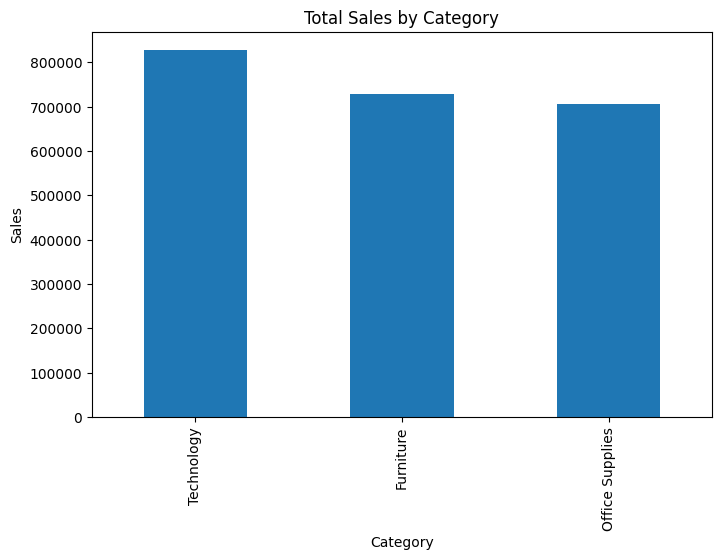

In [10]:
plt.figure(figsize=(8,5))
category_s.plot(kind='bar', title="Total Sales by Category")
plt.ylabel("Sales")
plt.show()

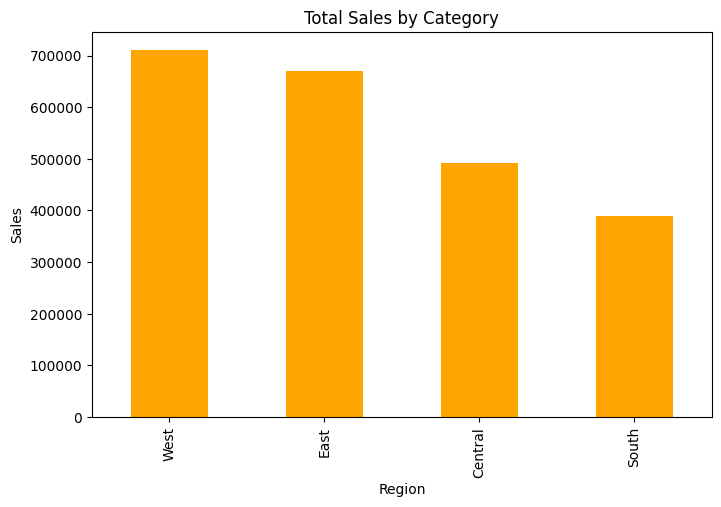

In [11]:
plt.figure(figsize=(8,5))
region_s.plot(kind='bar', color='orange',title="Total Sales by Category")
plt.ylabel("Sales")
plt.show()

**Seasonal Trend**

In [14]:
df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst=True)
df['Month'] = df['Order Date'].dt.to_period("M")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   object        
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [15]:
monthly_s  = df.groupby("Month")["Sales"].sum()

print(monthly_s)

Month
2015-01     14205.7070
2015-02      4519.8920
2015-03     55205.7970
2015-04     27906.8550
2015-05     23644.3030
2015-06     34322.9356
2015-07     33781.5430
2015-08     27117.5365
2015-09     81623.5268
2015-10     31453.3930
2015-11     77907.6607
2015-12     68167.0585
2016-01     18066.9576
2016-02     11951.4110
2016-03     32339.3184
2016-04     34154.4685
2016-05     29959.5305
2016-06     23599.3740
2016-07     28608.2590
2016-08     36818.3422
2016-09     63133.6060
2016-10     31011.7375
2016-11     75249.3995
2016-12     74543.6012
2017-01     18542.4910
2017-02     22978.8150
2017-03     51165.0590
2017-04     38679.7670
2017-05     56656.9080
2017-06     39724.4860
2017-07     38320.7830
2017-08     30542.2003
2017-09     69193.3909
2017-10     59583.0330
2017-11     79066.4958
2017-12     95739.1210
2018-01     43476.4740
2018-02     19920.9974
2018-03     58863.4128
2018-04     35541.9101
2018-05     43825.9822
2018-06     48190.7277
2018-07     44825.1040
2018-

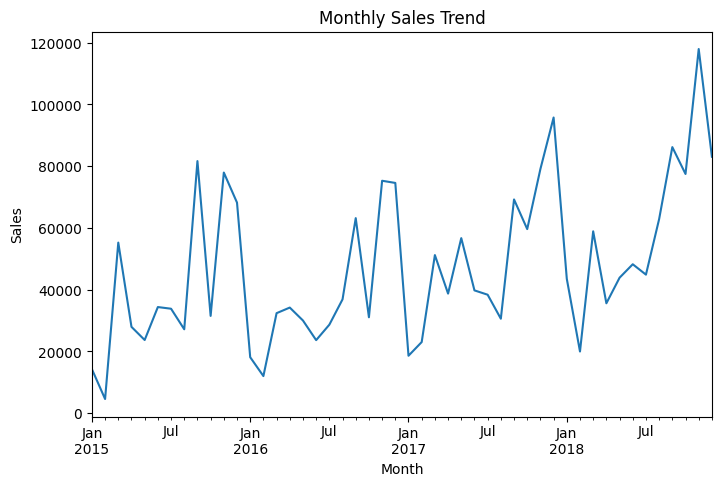

In [16]:
plt.figure(figsize=(8,5))
monthly_s.plot(title="Monthly Sales Trend")
plt.ylabel("Sales")
plt.show()